In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
print(data.feature_names)
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [ ]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}

In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append({"Model": name, "Accuracy": acc, "F1-Score": f1, "AUC-ROC": auc})

results_df = pd.DataFrame(results)
print(results_df)

           Model  Accuracy  F1-Score   AUC-ROC
0  Random Forest  0.964912  0.972222  0.995251
1            SVM  0.982456  0.986111  0.997380
2            KNN  0.947368  0.957746  0.981985


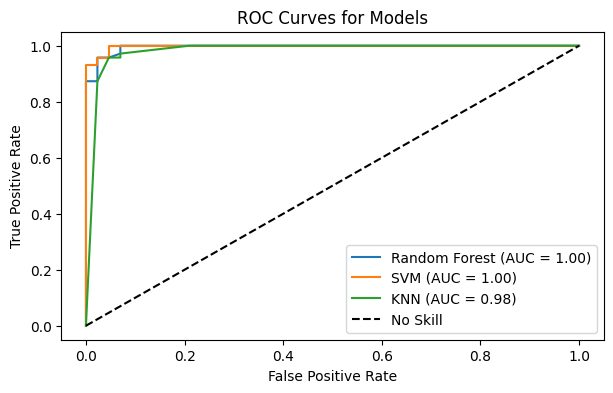

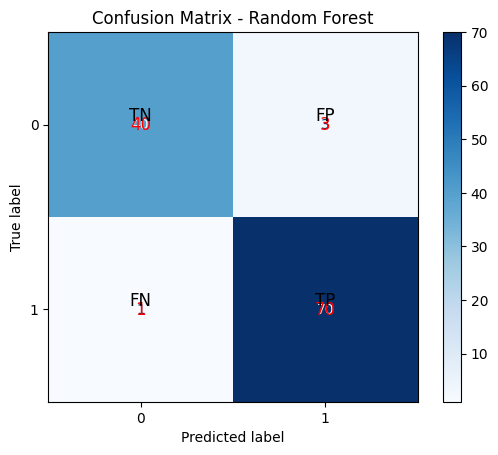

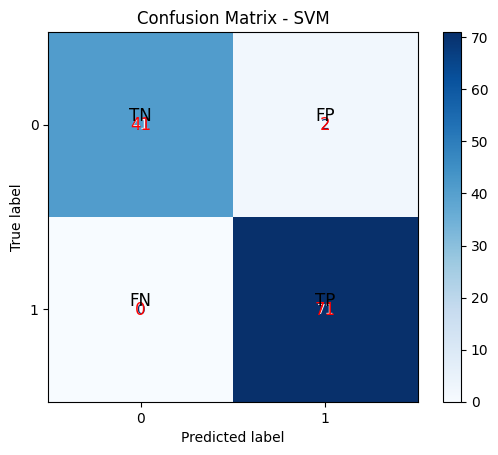

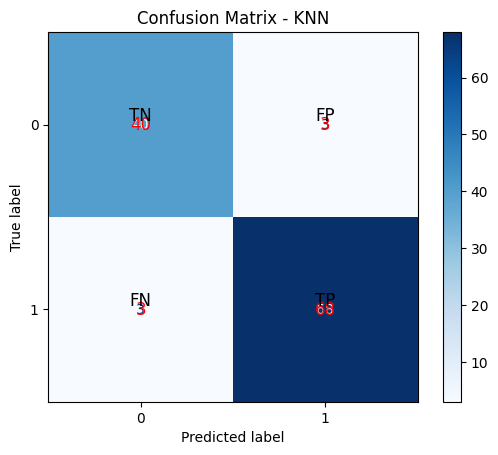

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fpr = {}
tpr = {}
auc_scores = {}
y_pred = {}

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr[name], tpr[name], _ = roc_curve(y_test, y_prob)
    auc_scores[name] = auc(fpr[name], tpr[name])
    y_pred[name] = model.predict(X_test)

plt.figure(figsize=(7, 4))
for name in models.keys():
    plt.plot(fpr[name], tpr[name], label=f'{name} (AUC = {auc_scores[name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Models')
plt.legend()
plt.show()

for name in models.keys():
    cm = confusion_matrix(y_test, y_pred[name])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize=12)
    plt.text(0, 0, 'TN', ha='center', va='bottom', color='black', fontsize=12)
    plt.text(0, 1, 'FN', ha='center', va='bottom', color='black', fontsize=12)
    plt.text(1, 0, 'FP', ha='center', va='bottom', color='black', fontsize=12)
    plt.text(1, 1, 'TP', ha='center', va='bottom', color='black', fontsize=12)
    plt.show()